# Part 1 Dependence and Independence

Two events E and F are dependent if knowing something about whether E happens gives us information about whether F happens (and vice versa). Otherwise they are independent. For instance, if we flip a fair coin twice, the two flips are **independent**. Knowing that the first flip is HEADS does not give us any information about whether the second flip is HEADS. On the other hand, knowing whether the first flips is HEADS certainly gives us information about whether both flips are TAILS. These two events are **dependent**.

Mathematically, two events E and F are independent if the probability that they both happen is the product of the probabilities that each one happens:

P(E,F) = P(E)P(F)

Example, the probability of "first flip is HEADS" is 1/2, and the probability of "both flips is TAILS" is 1/4, but the probability of "first flip is HEADS and both flips TAILS" is 0.

# Part 2 Conditional Probability

Events E and F are independent:

**P(E ∩ F) = P(E)P(F)**

If they are dependent, then we define the conditional probability of E given F as:

P(E|F) = P(E ∩ F) / P(F)

or equivalently:

**P(E ∩ F) = P(E|F)P(F)**

One common tricky example involves a family with two (unknown) children. Assume that:
- Each child is equally likely to be a boy or a girl
- The gender of second child is independent of the gender of the first child

Then: 
- P("no girls") = 1/4
- P("one girl, one boy") = 1/2
- P("two girls") = 1/4

Now, we can know:

P("both children are girls" | "the older child is a girl") 
- = P("both children are girls" ∩ "the older child is a girl") / P("the older child is a girl")
- = P("both children are girls") / P("the older child is a girl")
- = 0.25 / 0.5
- = 0.5

On the other hand:

P("both children are girls" | "at least one of the children is girl")
- = P("both children are girls ∩ at least one of the children is girl") / P("at least one of the children is girl)
- = P("both children are girls") / P("at least one of the children is girl")
- = 0.25 / 0.75
- = 1/3

In [3]:
# Generating result on a lot of families

import enum, random

class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

print("P(both | older):", both_girls / older_girl)
print("P(both | either):", both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


# Part 3 Bayes' Theorem

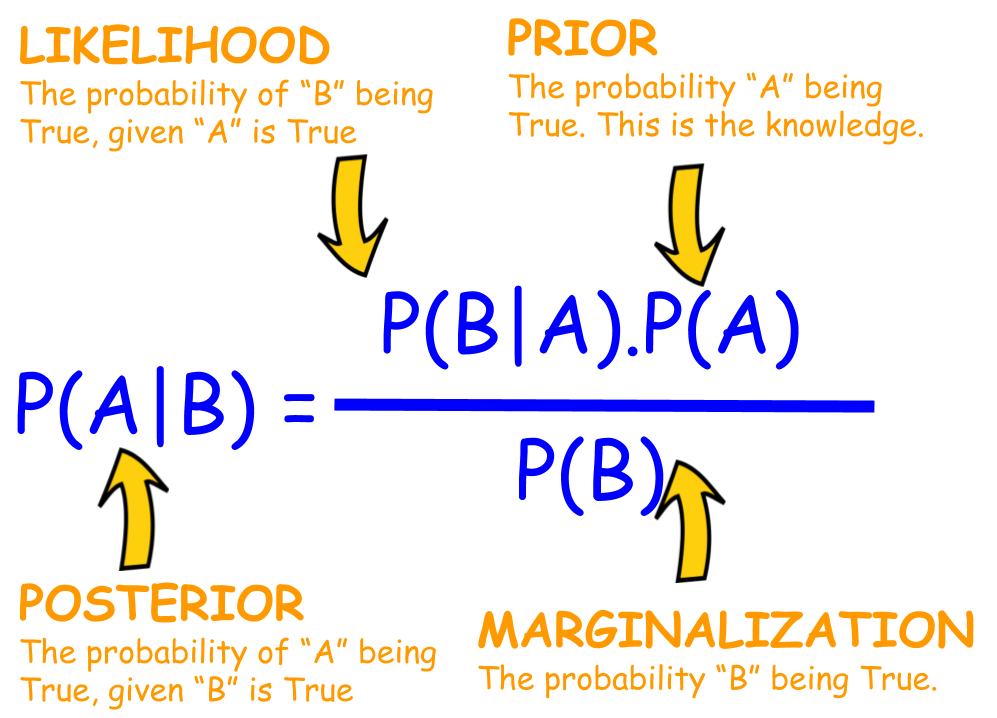

The event F can be split into two mutually exclusive events: "F and E" and "F and not E". Therefore:

P(F) = P(F ∩ E) + P(F ∩ E')

so that:

**P(E|F) = P(F|E)P(E) / P(F)** equals to
- **P(E|F) = P(F|E)P(E) / [P(F|E)P(E) + P(F|E')P(E')]**

Imagine:

- A disease affects 1 in 10,000 people
- A test for the disease is 99% accurate

Given:
- D = "has disease"
- D' = "does not have disease"
- T = "tests positive"

Then:
- P(D) = 0.0001
- P(D') = 0.9999
- P(T|D) = 0.99
- P(T|D') = 0.01

We can calculate:
- P(D|T) 
- = P(T|D) P(D) / [P(T|D) P(D) + P(T|D') P(D')]
- = 0.99 * 0.0001 / [0.99 * 0.0001 + 0.01 * 0.9999]
- = 0.0098
Which means that the probability of having the disease given that the test is positive is 0.98%.

# Part 4 Random Variables

Random variables are like magic guessers that tell us about uncertain stuff. Imagine you're flipping a coin: heads or tails? That's a random variable! It can be 0 for tails and 1 for heads. Now, think about how likely each outcome is. The chance of getting heads might be 50%, and tails 50%. That's the probability distribution. Then, there's the expected value, which is like guessing the average outcome. For a fair coin, it's halfway between heads and tails, so it's 0.5. Also, we can adjust our guesses based on conditions. Like, if we know one child in a family is a girl, what's the chance the other is a girl too? Random variables help us figure out these uncertain things in life, like flipping coins or predicting family compositions.

We can define a new random variable Y that gives the number of girls conditional on at least one of the children being a girl. Then Y equals 1 with probability 2/3 and 2 with probability 1/3. And a variable Z that’s the number of girls conditional on the older child being a girl equals 1 with probability 1/2 and 2 with probability 1/2.

# Part 5 Continuous Distributions

In [5]:
# Probability Density Function(PDF) for the uniform distribution:

def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

In [6]:
# Cumulative Distribution Function(CDF) for the uniform distribution:
# Gives the probability that a random variable is less than or equal to a certain value

def uniform_cdf(x: float) -> float:
    """ Returns the probability that a uniform random variable is <= x """
    if x < 0:       return 0    # Uniform random is never less than 0
    elif x < 1:     return x    # e.g. P(X <= 0.4) = 0.4
    else:           return 1    # Uniform random is always less than 1

# Part 6 The Normal Distribution

- Classic bell curve-shaped distribution.
- Completely determined by two parameters: mean (μ) and standard deviation (σ).
- The mean is the peak of the curve, and the standard deviation is the width.

It has the PDF:

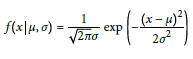



In [7]:
# Implementation:

import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

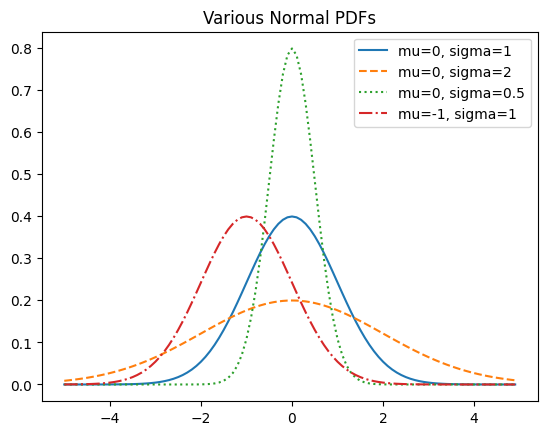

In [9]:
# Plotting the normal distribution:

import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, mu=0, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, mu=0, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, mu=0, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1, sigma=1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal PDFs")
plt.show()

When μ = 0 and σ = 1, it's called the standard normal distribution. We can convert any normal distribution to the standard normal distribution using the Z-score formula:

Z = (X - μ) / σ

where X is the value of the random variable, μ is the mean, and σ is the standard deviation.

In [11]:
# Cumulative Distribution Function for the normal distribution:
# The CDF for the normal distribution cannot be written in an “elementary” manner,
# but we can write it using Python’s math.erf error function:

def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

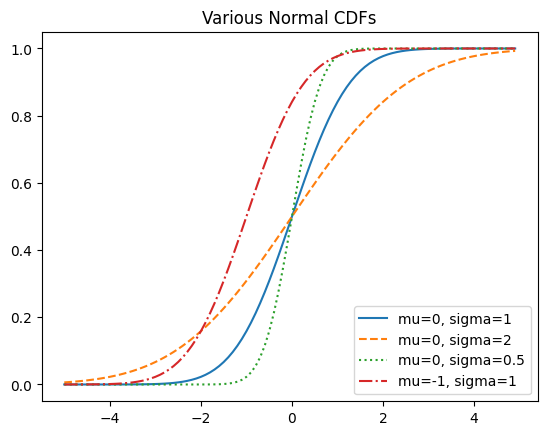

In [12]:
# Plotting the normal CDF:

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, mu=0, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, mu=0, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, mu=0, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1, sigma=1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal CDFs")
plt.show()

Sometimes we'll need to invert normal_cdf to find the value corresponding to a specific probability. We can use the binary search algorithm to find the value of Z that corresponds to a specific probability.

In [13]:
# Inverse of the normal CDF:

def inverse_normal_cdf(p: float, 
                       mu: float = 0, 
                       sigma: float = 1, 
                       tolerance: float = 0.00001) -> float:
    """ Find approximate inverse using binary search """

    # If not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0   # normal_cdf(-10) is very close to 0
    hi_z = 10.0     # normal_cdf(10) is very close to 1

    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2          # Consider the midpoint
        mid_p = normal_cdf(mid_z)           # and the CDF's value there
        if mid_p < p:
            low_z = mid_z                   # Midpoint too low, search above it
        else:
            hi_z = mid_z                    # Midpoint too high, search below it

    return mid_z

The function repeatedly bisects intervals until it narrows in on a Z that’s close enough to the desired probability.

# Part 7 The Central Limit Theorem

One reason the normal distribution is so useful is the central limit theorem, which says that a random variable defined as the average of a large number of independent and identically distributed random variables is itself approximately normally distributed.

In particular, if X1, X2, ..., Xn are random variables with mean μ and standard deviation σ, and if n is large, then:

(X1 + X2 + ... + Xn) / n

is approximately normally distributed with mean μ and standard deviation σ / √n.

This is true regardless of the distribution of the underlying random variables. This is why the normal distribution is so common in statistics.

An easy way to illustrate this is bu looking at biniomial random variables. If we have a binomial(n, p) random variable, then as n gets larger, the distribution of the random variable approaches a normal distribution with mean np and standard deviation √(np(1-p)).

In [15]:
# Bernoulli trial: A random experiment with exactly two possible outcomes, "success" and "failure"

def bernoulli_trial(p: float) -> int:
    """ Returns 1 with probability p and 0 with probability 1-p """
    return 1 if random.random() < p else 0

In [18]:
# Binomial distribution: The sum of n independent Bernoulli(p) trials

def binomial(n: int, p: float) -> int:
    """ Returns the sum of n independent Bernoulli(p) trials """
    return sum(bernoulli_trial(p) for _ in range(n))

That mean of a Bernoulli(p) random variable is p and its standard deviation is √(p(1-p)). So, the mean of a binomial(n, p) random variable is np and its standard deviation is √(np(1-p)).

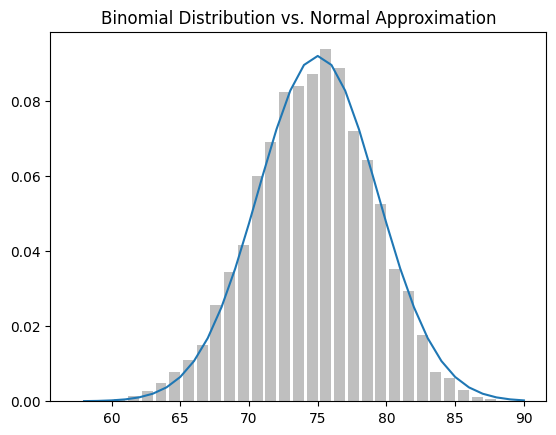

In [19]:
# Plotting the binomial distribution:

from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """ Picks points from a Binomial(n, p) and plots their histogram """
    data = [binomial(n, p) for _ in range(num_points)]

    # Use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # Use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

binomial_histogram(0.75, 100, 10000)

The moral of this approximation is that if you want to know the probability that (say) a fair coin turns up more than 60 heads in 100 flips, you can estimate it as the probability that a Normal(50,5) is greater than 60, which is easier than computing the Binomial( 100,0.5) CDF. (Although in most applications you’d probably be using statistical software that would gladly compute whatever probabilities you want.)